In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
# import pymc3 as pm
import emcee as em
from scipy.stats import linregress
import corner

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
df = pd.read_csv('location_data_hw8_2022.csv')
df.rename(columns={'red_pos_X' : 'red_x', 
                   'red_pos_Y' : 'red_y',
                   'blue_pos_X' : 'blue_x',
                   'blue_pos_Y' : 'blue_y' }, inplace=True)

In [12]:
df.head()

,t,red_x,red_y,blue_x,blue_y
0,1.718397,1.330174,0.993564,1.081700,-1.295918
1,2.998056,1.310404,1.012772,1.004997,-1.254394
2,6.015073,1.270312,1.028386,1.113696,-1.321257
3,8.267651,1.331131,0.948223,1.001845,-1.285209
4,9.279321,1.346159,0.963485,1.113008,-1.261147


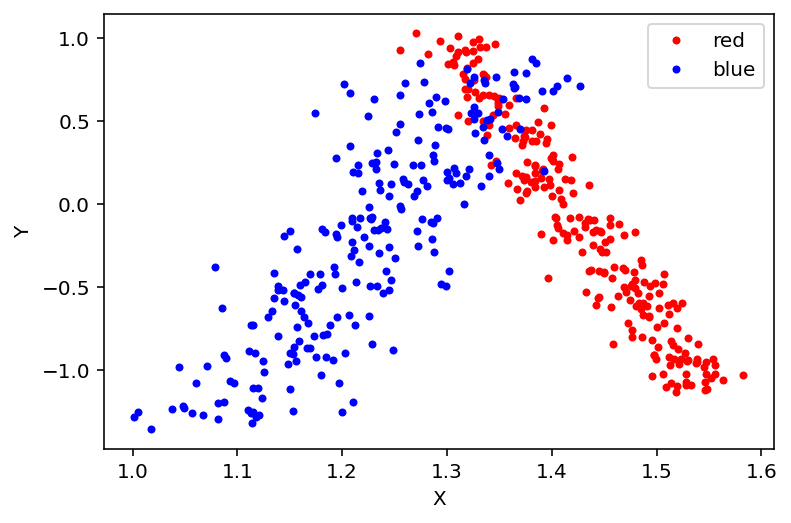

In [13]:
plt.figure()
plt.plot(df['red_x'], df['red_y'], 'ro', markersize=3, label='red')
plt.plot(df['blue_x'], df['blue_y'], 'bo', markersize=3, label='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

LinregressResult(slope=0.0002584023373938226, intercept=1.3023058484320011, rvalue=0.958279370073825, pvalue=2.3767273054182636e-130, stderr=5.0171958052575615e-06, intercept_stderr=0.002799299370226853)
LinregressResult(slope=-0.002262720362212095, intercept=0.9819136208113076, rvalue=-0.9995292447276786, pvalue=0.0, stderr=4.521066079698805e-06, intercept_stderr=0.0025224882426140745)


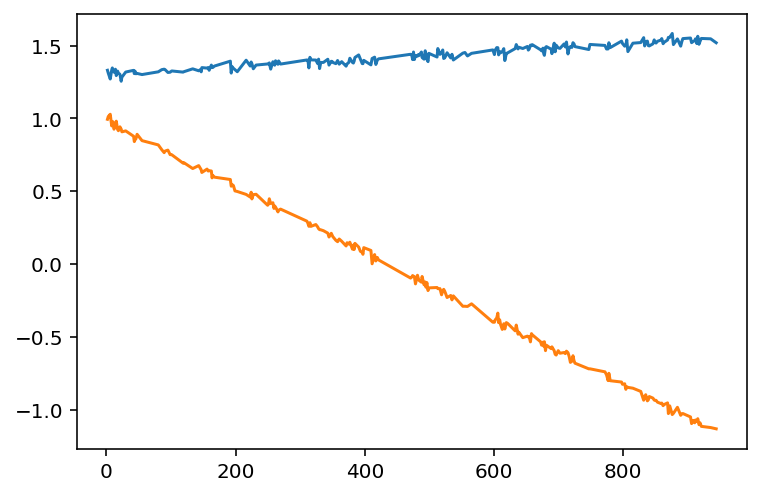

LinregressResult(slope=0.00027071036476211853, intercept=1.0935408554945725, rvalue=0.8405144421005032, pvalue=9.411821597599109e-65, stderr=1.1358840421347873e-05, intercept_stderr=0.006337563067533919)
LinregressResult(slope=0.002269521590767623, intercept=-1.3043323792349888, rvalue=0.9970519932669353, pvalue=3.6863864573714527e-265, stderr=1.1368925815652285e-05, intercept_stderr=0.006343190122769684)


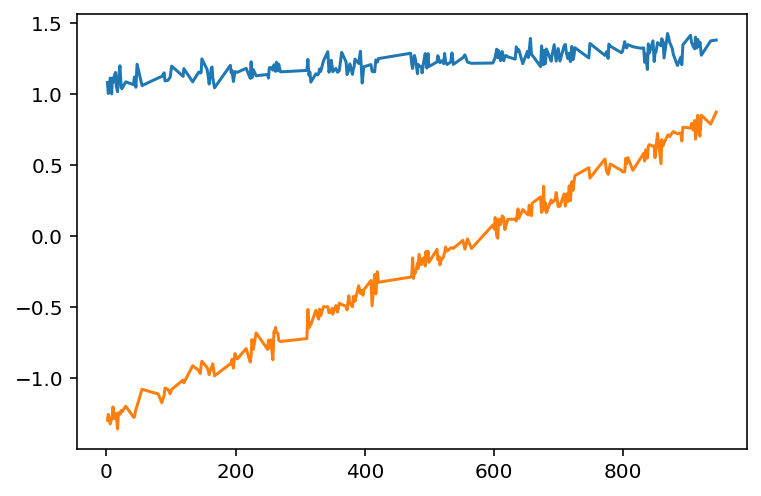

In [41]:
plt.figure()
plt.plot(df['t'], df['red_x'])
plt.plot(df['t'], df['red_y'])
print(linregress(df['t'], df['red_x']))
print(linregress(df['t'], df['red_y']))
plt.show()

plt.figure()
plt.plot(df['t'], df['blue_x'])
plt.plot(df['t'], df['blue_y'])
print(linregress(df['t'], df['blue_x']))
print(linregress(df['t'], df['blue_y']))
plt.show()

In [137]:
def log_prob(theta, x, y, t):
    v_rx, v_ry, x0, y0  = theta
    x_curr = x0 + t * v_rx
    y_curr = y0 + t * v_ry
    return - np.sum( (x - x_curr)**2 + (y - y_curr)**2 )
    # return -np.sum((x - (v*t + b))**2)

ndim, nwalkers = 4, 10

sampler = em.EnsembleSampler(nwalkers, ndim, log_prob, args=(df['red_x'], df['red_y'], df['t']))

p0 = [0.0001, -0.001, 1, 1] + 0.01*np.random.randn(nwalkers, ndim)
sampler.run_mcmc(p0, 10000)

State([[ 3.83554417e-04 -2.23145831e-03  1.20624303e+00  8.96780110e-01]
 [ 2.09642517e-04 -2.49074223e-03  1.35667337e+00  1.08736075e+00]
 [ 1.74173111e-04 -2.52805185e-03  1.29468594e+00  1.09403238e+00]
 [ 3.29135062e-04 -2.24770795e-03  1.25955197e+00  1.00425196e+00]
 [ 1.34898617e-04 -2.29371661e-03  1.39869785e+00  9.92745022e-01]
 [ 3.37558332e-04 -2.13719475e-03  1.27588177e+00  9.61197886e-01]
 [ 6.85878129e-04 -2.28083830e-03  1.05926498e+00  9.64235073e-01]
 [ 1.59649349e-04 -2.14133855e-03  1.37719708e+00  9.24203663e-01]
 [ 2.91847523e-04 -2.15413178e-03  1.28283232e+00  9.48916942e-01]
 [ 7.28586823e-05 -2.59595162e-03  1.43380671e+00  1.15718788e+00]], log_prob=[-1.95153692 -1.39812189 -2.20948094 -0.51235186 -0.8029971  -1.0078808
 -3.93845998 -0.80456416 -0.51964903 -3.24989665], blobs=None, random_state=('MT19937', array([2226354628, 3764427260, 2663884538, 2292634962, 2960964994,
        189754984, 2536083292, 2766907877, 3879716339, 1238864829,
        460818531, 

In [138]:
samples = sampler.get_chain()

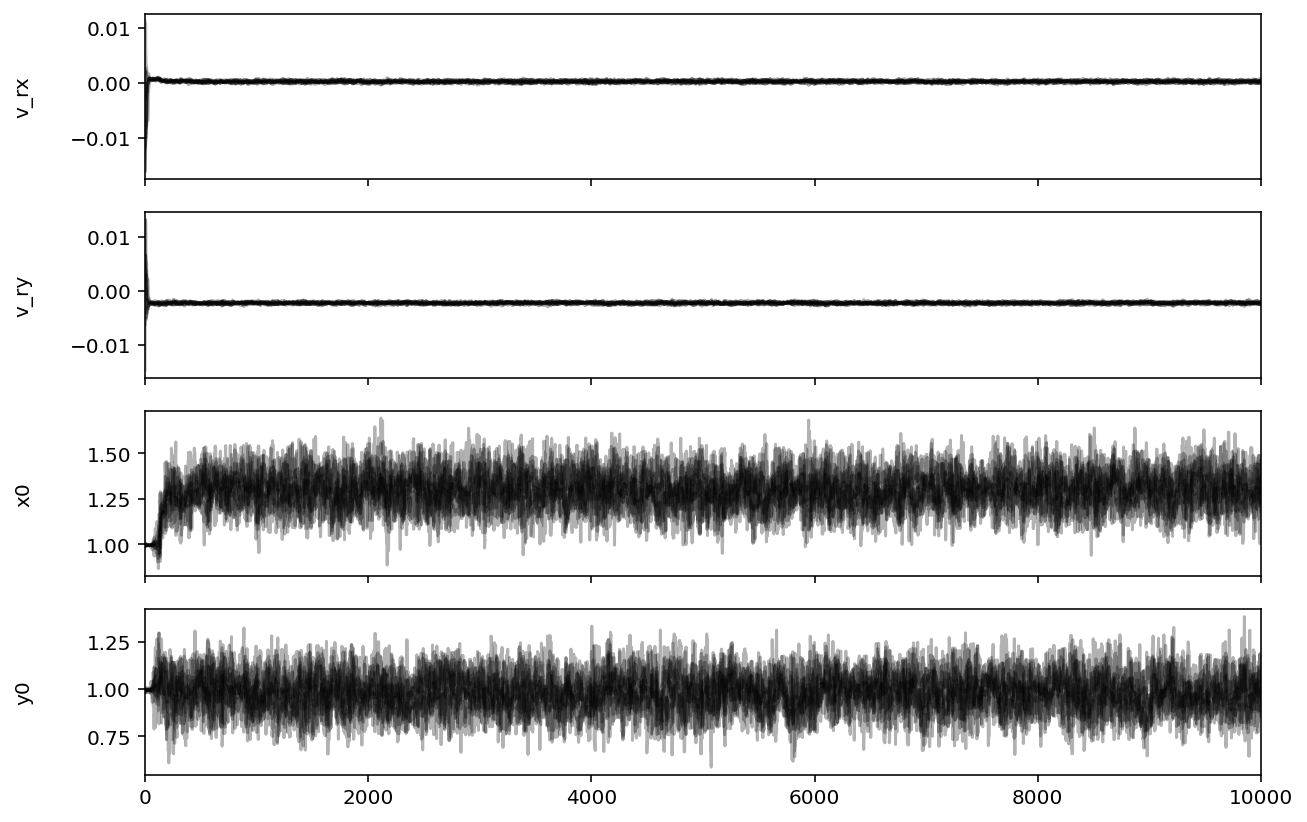

In [139]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["v_rx", 'v_ry', 'x0', 'y0']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

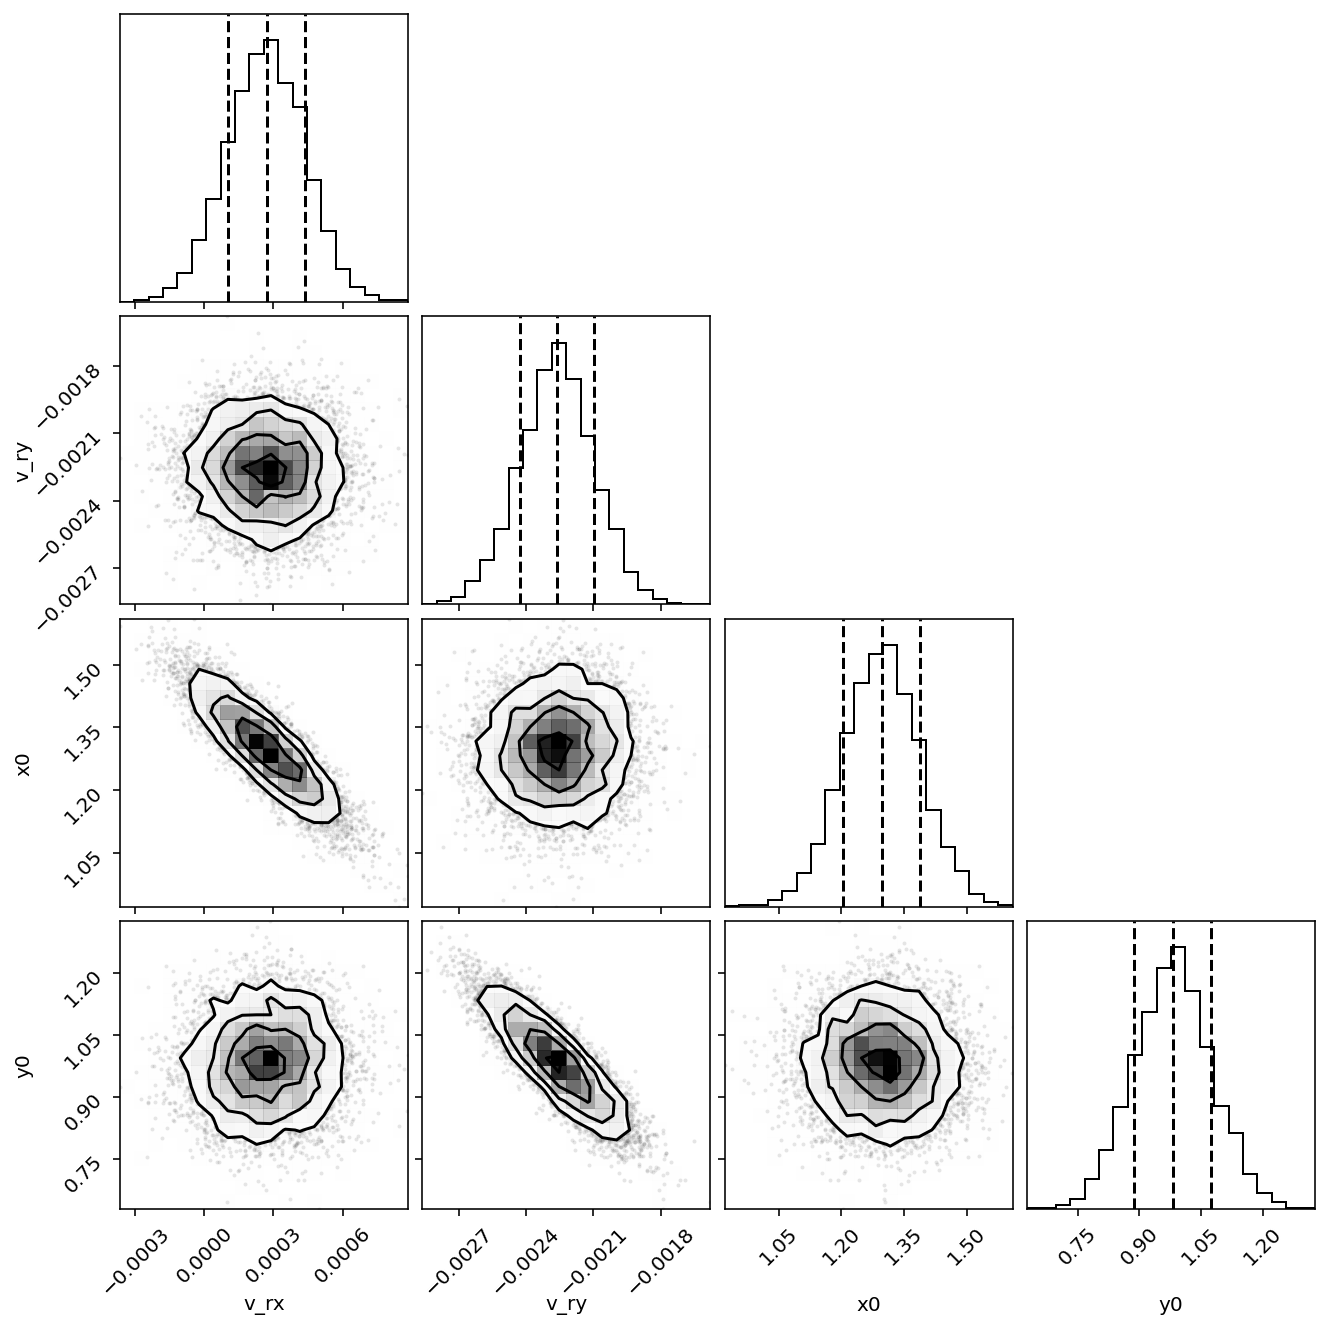

In [140]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(
    flat_samples, labels=labels,quantiles=[0.16, 0.5, 0.84])# truths=[m_true, b_true, np.log(f_true)]
# );

In [142]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>